In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data=pd.read_csv('textResponses.csv')

In [3]:
data['pattern']=''
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'

D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\anaconda\envs\ntds_2019\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\ntds_2019\lib\s

In [4]:
group_data=data.groupby(['Anon Student Id','Level (Assignment)'])[['Duration (sec)','pattern','Input','Problem Name']]

In [5]:
group_data.head()

,Duration (sec),pattern,Input,Problem Name
0,132.5,test,"no, because you don't change the denominater s...",5
1,581,test,I do not know this answer.,6
2,15.75,collaborative,Frist you need to double the denometor then do...,1a
3,0.333,collaborative,"First, multiply the denominater by two then do...",2a
4,11,collaborative,first muply 8 by 2 then do the same to the num...,3a
...,...,...,...,...
7321,11.5,collaborative,find the least common denominator not just a c...,3a
7322,4.5,collaborative,Do not add the numerator,4a
7323,0.333,collaborative,The larger denominator is not always the large...,5a
7327,47.5,test,It cant be 6/13 becuase of the picture shown. ...,5


In [6]:
group_data.size()

Anon Student Id                       Level (Assignment)                
Stu_005a9729f8e3869ff12b105e0f7bb82e  Comparing Erroneous Collaboration     4
                                      Equivalent Erroneous Collaboration    5
                                      LCD Erroneous Collaboration           8
                                      Show what you know A                  2
                                      Show what you learned B               2
                                                                           ..
Stu_ff8ca883ce7d29e296f0ed8e55a3b31d  Show what you learned B               2
Stu_ffe4ba291fd0ec27d27a34dcceb3a617  Comparing Erroneous Collaboration     8
                                      LCD Erroneous Collaboration           9
                                      Show what you know B                  2
                                      Show what you learned A               2
Length: 1878, dtype: int64

In [7]:
data_rows=[temp_row for temp_row in group_data]

In [8]:
for a in data_rows[187][1].Input:
    print(a)

I think the answer is 1 and 1/20 because the lowest common denominator is 40, so 2/8= 10/40 and 4/5=
I think the answer is 1 and 1/20 because the lowest common denominator is 40, so 2/8= 10/40 and 4/5=32/40 and 10/40+32/40= 42/40 which then simplifies to 1 and 2/40 which then simplifies to 1 and 1/20.
32/65 is smaller because 32/65 is a smaller amount and has a higher denominator, and 32/45 are part of a bigger amount and have the lower denominator with the same numerator, therefore 32/65 is smaller.


In [9]:
analyze_list=[]

In [10]:
len(group_data)

1878

In [12]:
from nltk.metrics import edit_distance
ind_duration_mean=[]
ind_duration_sum=[]
ind_mod_num=[]
ind_mod_ed_mean=[]
ind_mod_ed_sum=[]

col_duration_mean=[]
col_duration_sum=[]
col_mod_num=[]
col_mod_ed_mean=[]
col_mod_ed_sum=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        col_duration_mean.append(temp_durance_mean)
        col_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        col_mod_num.append(temp_mod_num)
        col_mod_ed_mean.append(temp_mod_mean)
        col_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        ind_duration_mean.append(temp_durance_mean)
        ind_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        ind_mod_num.append(temp_mod_num)
        ind_mod_ed_mean.append(temp_mod_mean)
        ind_mod_ed_sum.append(temp_mod_sum)
    
    

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

# Mean Duration

In [14]:
stats.ttest_ind(ind_duration_mean,col_duration_mean,equal_var = False)

Ttest_indResult(statistic=-3.675791363307244, pvalue=0.0002542002492319173)

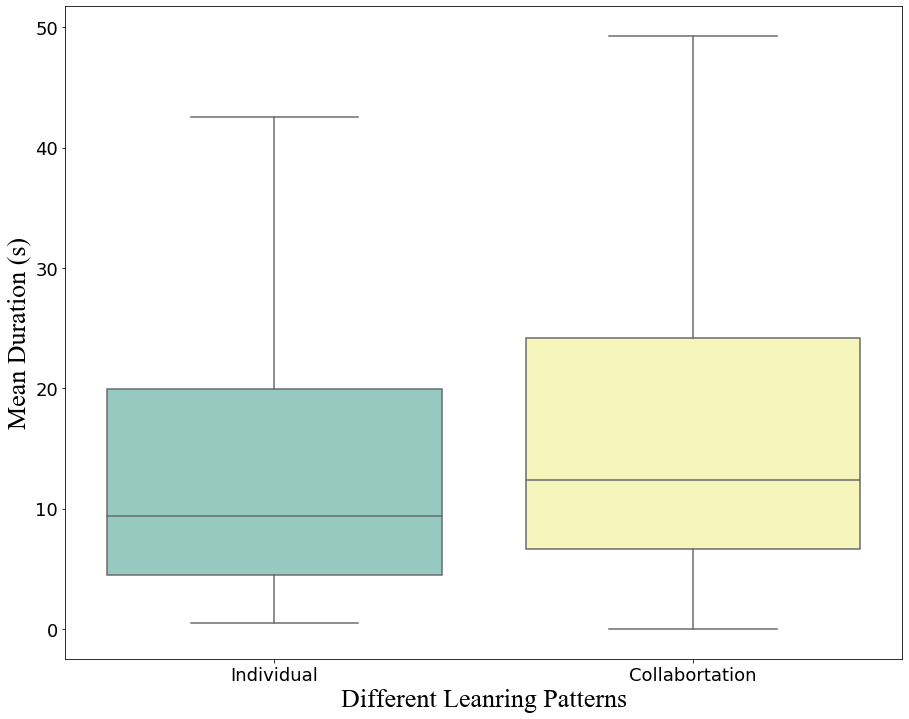

In [15]:
patterns=["Individual"]*len(ind_duration_mean)+ ['Collabortation']*len(col_duration_mean)
values=np.concatenate((ind_duration_mean,col_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Duration

In [16]:
stats.ttest_ind(ind_duration_sum,col_duration_sum,equal_var = False)

Ttest_indResult(statistic=3.4488137910696346, pvalue=0.0006124374996547791)

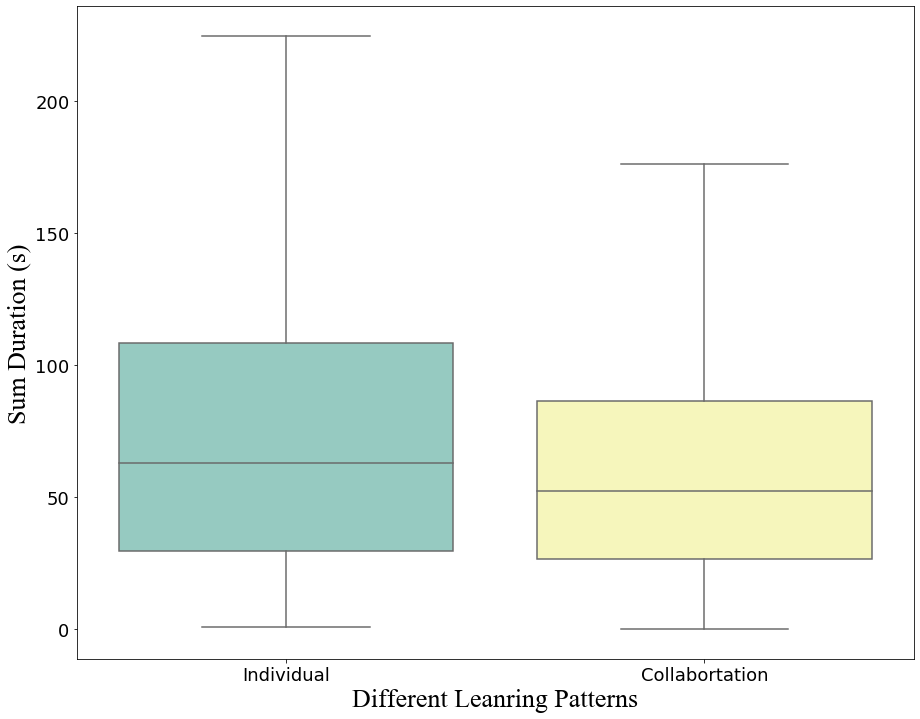

In [17]:
patterns=["Individual"]*len(ind_duration_sum)+ ['Collabortation']*len(col_duration_sum)
values=np.concatenate((ind_duration_sum,col_duration_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Number of Modifications

In [18]:
stats.ttest_ind(ind_mod_num,col_mod_num,equal_var = False)

Ttest_indResult(statistic=13.600176069851846, pvalue=8.187269361020857e-37)

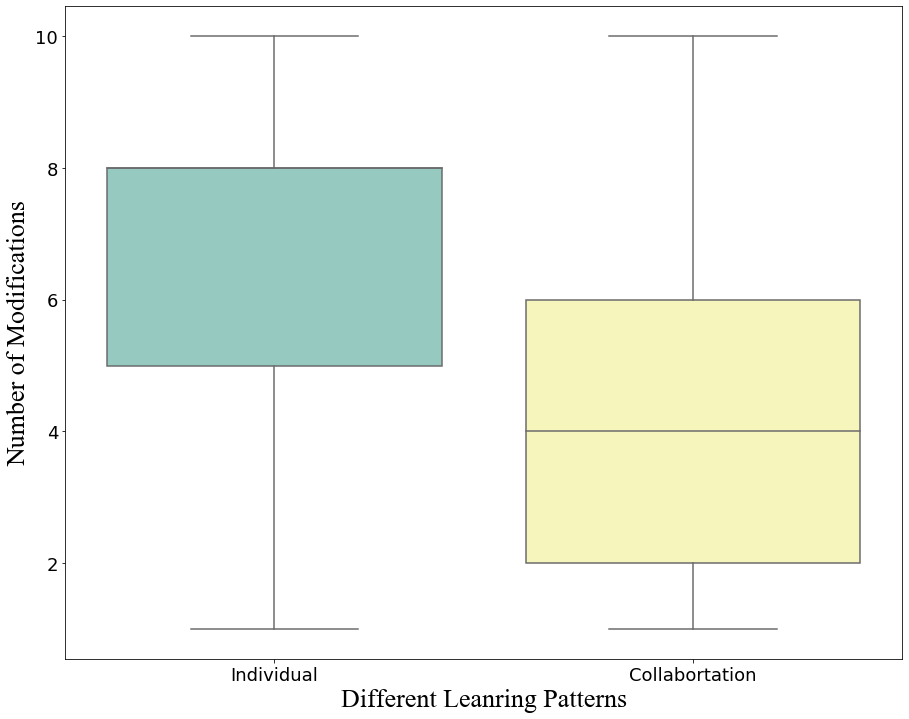

In [19]:
patterns=["Individual"]*len(ind_mod_num)+ ['Collabortation']*len(col_mod_num)
values=np.concatenate((ind_mod_num,col_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Mean Edit Distance of Modifications

In [20]:
stats.ttest_ind(ind_mod_ed_mean,col_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=1.694775486611617, pvalue=0.09080253634748384)

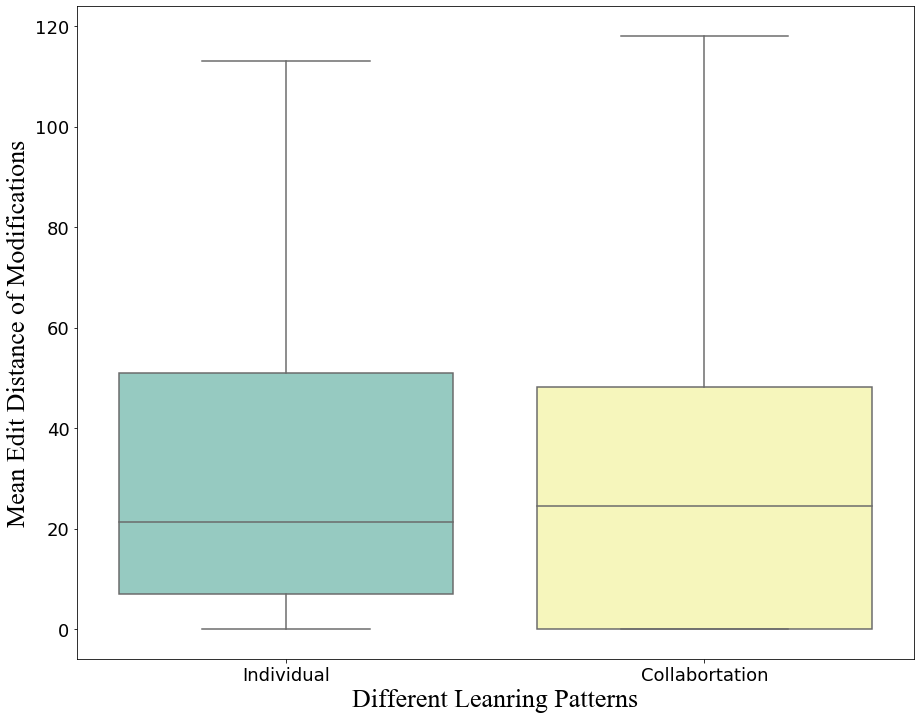

In [21]:
patterns=["Individual"]*len(ind_mod_ed_mean)+ ['Collabortation']*len(col_mod_ed_mean)
values=np.concatenate((ind_mod_ed_mean,col_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Edit Distance of Modifications

In [22]:
stats.ttest_ind(ind_mod_ed_sum,col_mod_ed_sum,equal_var = False)

Ttest_indResult(statistic=4.9698257150693, pvalue=9.71648198752058e-07)

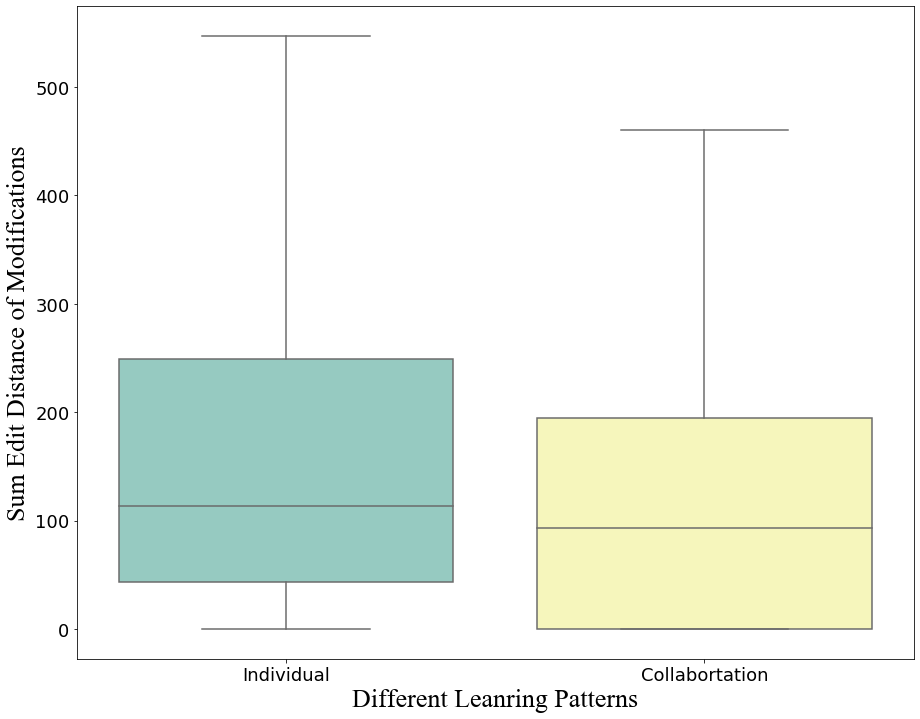

In [23]:
patterns=["Individual"]*len(ind_mod_ed_sum)+ ['Collabortation']*len(col_mod_ed_sum)
values=np.concatenate((ind_mod_ed_sum,col_mod_ed_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [25]:
teach_data=pd.read_csv('prepostReducedPartial.csv')
teach_data.head()

,Student_ID,Time,Type,Test,Class,Teacher,SchoolDistrict,AssignedCondition,ActualCondition,Dyad,...,ErrorsLCDErroneous,ErrorsLCDProcedural,ErrorsErroneous,ErrorsProcedural,ErrorsTotal,WrittenLength,StudentDuration,ClassDuration,TotalPercentStudentDuration,TotalPercentClassDuration
0,Stu_005a9729f8e3869ff12b105e0f7bb82e,Pretest,A,Pretest A,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,104.0,32,36,0.006944,NaN
1,Stu_005a9729f8e3869ff12b105e0f7bb82e,Posttest,B,Posttest B,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,26.0,26,61,0.029440,NaN
2,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Pretest,B,Pretest B,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,135.0,32,48,0.003472,NaN
3,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Posttest,A,Posttest A,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,78.0,27,43,0.019204,NaN
4,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,Pretest,A,Pretest A,Marchiona 1,Marchiona,Hopewell,M,M,431.0,...,13,5,60,19,79,201.0,38,1152,0.003899,NaN


In [26]:
teach_data.Teacher.value_counts()

Marchiona      122
Rongaus         78
Huffman         40
Ewonce          38
Rinier          36
Giovannitti     36
Genes           34
Pucka           34
Rindels         34
Deley           32
Brallier        32
Shaffer         26
Pilyih          26
Herrington      24
Shields         22
Name: Teacher, dtype: int64

In [43]:
teach_data_reduced=teach_data[teach_data.Time=='Pretest'][['Student_ID','Teacher','Gender']]
data=data.rename(index=str, columns={"Anon Student Id": "Student_ID"})
new_data=pd.merge(data, teach_data_reduced, on='Student_ID')

In [44]:
new_data

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern,Teacher,Gender
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,test,Deley,Male
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,test,Deley,Male
2,723,All Data,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,America/New_York,15.75,ATTEMPT,Student2,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,collaborative,Deley,Male
3,758,All Data,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,America/New_York,0.333,ATTEMPT,NaN,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,collaborative,Deley,Male
4,801,All Data,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,America/New_York,11,ATTEMPT,Student2,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,collaborative,Deley,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,1027088,All Data,302d7089f553ab29edf2ee73017782a6,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 8:57,America/New_York,7.5,ATTEMPT,Student2,...,"1,1,0,0,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 12:57:01.317 UTC,2016-05-05 12:57:01.410 UTC,collaborative,Rongaus,Male
5712,1027197,All Data,17aeb9854ed2bd9ca3608ea5af163cf3,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:02,America/New_York,6.5,ATTEMPT,Student2,...,"1,1,1,0,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:02:49.120 UTC,2016-05-05 13:02:49.123 UTC,collaborative,Rongaus,Male
5713,1027258,All Data,fbe5e24bd131fa7faf3323484eebc43e,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:04,America/New_York,4.75,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:04:34.486 UTC,2016-05-05 13:04:34.573 UTC,collaborative,Rongaus,Male
5714,1027831,All Data,e2286da6386c8c31efd53d2203ea4601,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S85c20973b90e3b62f784ecd19838f7f4,5/6/16 10:22,America/New_York,0,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-06 14:22:10.521 UTC,2016-05-06 14:22:10.735 UTC,test,Rongaus,Male


In [49]:
group_data=new_data.groupby(['Student_ID','Level (Assignment)'])

In [54]:
data_rows=[temp_row for temp_row in group_data]
len(data_rows)

1427

In [76]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]

patterns=[]
genders=[]
teachers=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



    

In [139]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )


In [145]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

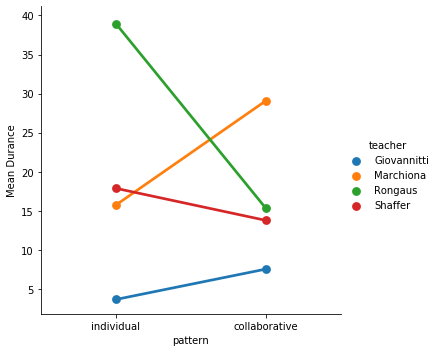

In [146]:
plot_learning_analysis('teacher','dur_mean','Mean Durance')

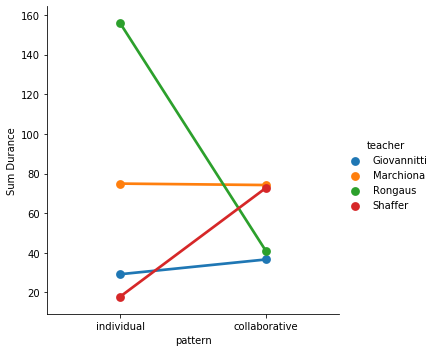

In [147]:
plot_learning_analysis('teacher','dur_sum','Sum Durance')

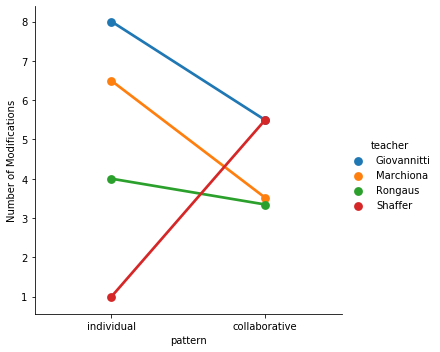

In [148]:
plot_learning_analysis('teacher','mod_num','Number of Modifications')

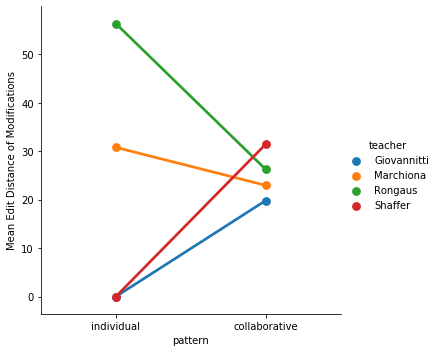

In [149]:
plot_learning_analysis('teacher','mod_ed_mean','Mean Edit Distance of Modifications')

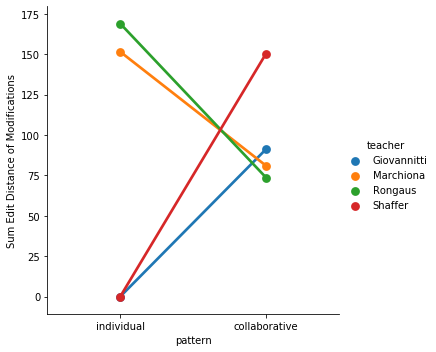

In [150]:
plot_learning_analysis('teacher','mod_ed_sum','Sum Edit Distance of Modifications')

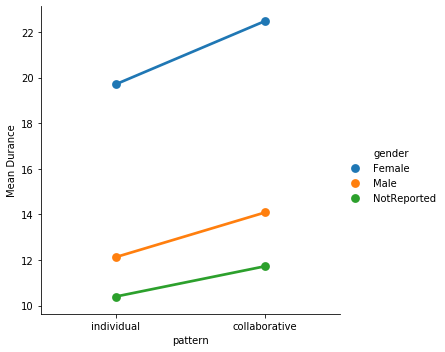

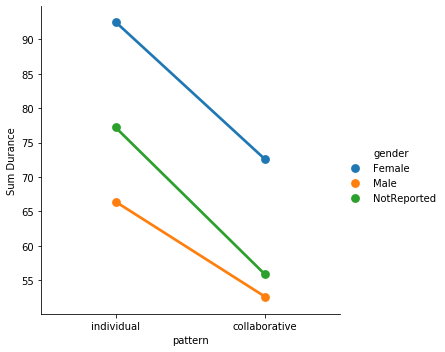

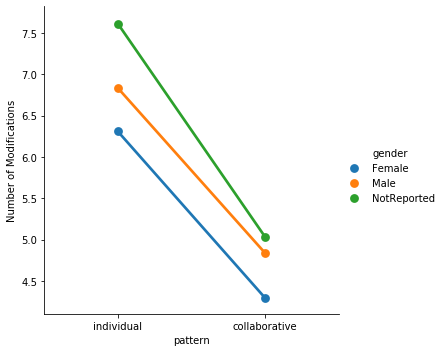

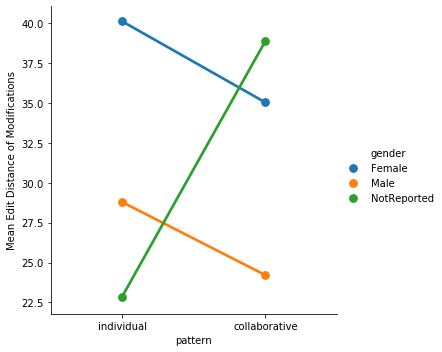

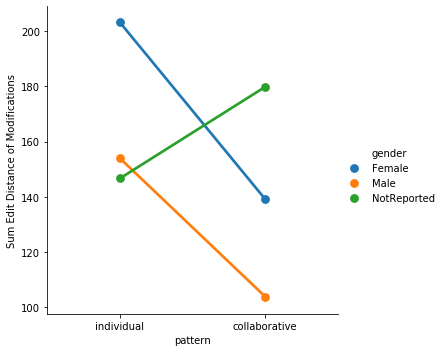

In [151]:
plot_learning_analysis('gender','dur_mean','Mean Durance')
plot_learning_analysis('gender','dur_sum','Sum Durance')
plot_learning_analysis('gender','mod_num','Number of Modifications')
plot_learning_analysis('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis('gender','mod_ed_sum','Sum Edit Distance of Modifications')